In [1]:
import pandas as pd

# Read Dataset

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/TDS_HW6/FAOSTAT_data_1961_2020.csv')
df1.shape 

(14635, 14)

In [4]:
df1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1961,ha,90000.0,E,Estimated value
1,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1962,1962,ha,90000.0,E,Estimated value
2,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1963,1963,ha,100000.0,E,Estimated value
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1964,1964,ha,100000.0,E,Estimated value
4,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1965,1965,ha,100000.0,E,Estimated value


# Data Preprocessing 

In [ ]:
column_headers = list(df1.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']


In [ ]:
# Removing the Unwanted and Redundant Columns from Dataset
df1=df1.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code','Year Code', 'Unit', 
              'Flag', 'Flag Description'],axis=1)

In [ ]:
df1.head()

,Element,Item Code (CPC),Item,Year,Value
0,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1961,90000.0
1,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1962,90000.0
2,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1963,100000.0
3,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1964,100000.0
4,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",1965,100000.0


In [ ]:
df1['Element']        # Element (Features) Column

0        Area harvested
1        Area harvested
2        Area harvested
3        Area harvested
4        Area harvested
              ...      
14630        Production
14631        Production
14632        Production
14633        Production
14634        Production
Name: Element, Length: 14635, dtype: object

# Group By Element

In [ ]:
data=df1.groupby(['Element', 'Item Code (CPC)','Year'], as_index=False).agg({'Value': 'first', 'Value': 'last'})

In [ ]:
data

,Element,Item Code (CPC),Year,Value
0,Area harvested,0111,1961,12927000.0
1,Area harvested,0111,1962,13570000.0
2,Area harvested,0111,1963,13590000.0
3,Area harvested,0111,1964,13499000.0
4,Area harvested,0111,1965,13422000.0
...,...,...,...,...
14630,Yield,01970,2016,17174.0
14631,Yield,01970,2017,17296.0
14632,Yield,01970,2018,17516.0
14633,Yield,01970,2019,17039.0


In [ ]:
pd.melt(data, id_vars =['Element'], value_vars =['Value'])

,Element,variable,value
0,Area harvested,Value,12927000.0
1,Area harvested,Value,13570000.0
2,Area harvested,Value,13590000.0
3,Area harvested,Value,13499000.0
4,Area harvested,Value,13422000.0
...,...,...,...
14630,Yield,Value,17174.0
14631,Yield,Value,17296.0
14632,Yield,Value,17516.0
14633,Yield,Value,17039.0


In [ ]:
data.iloc[0,0]

'Area harvested'

# Partitioning the data by elements

In [ ]:
init=data.iloc[0,0]

In [ ]:
# Finding the index where each element ends to seperate them and form feature columns with it
for i in range(data.shape[0]):
  if data.iloc[i,0]!=init:
    print('Table end index ', i )
    init=data.iloc[i,0]


Table end index  4873
Table end index  9917


In [ ]:
Y_1=data.iloc[0:4873,1:]            # DataFrame with Values of Area Harvested

Y_2=data.iloc[4873:9917,1:]         # DataFrame with Values of Production

Y_3=data.iloc[9917:,1:]             # DataFrame with Values of Yield

In [ ]:
# Assigning Corresponding Columns Names 

Y_1.rename(columns = {'Value':'Area harvested'}, inplace = True)  

Y_2.rename(columns = {'Value':'Production'}, inplace = True)

Y_3.rename(columns = {'Value':'Yield'}, inplace = True)

In [ ]:
y_1=pd.merge(Y_1, Y_2, how='inner')  # Merging Column Dataframes with Common Year data 

In [ ]:
Y=pd.merge(y_1, Y_3, how='inner')    # Merging Column Dataframes with Common Year data 

In [ ]:
Y                                    # Merged Dataframe 

,Item Code (CPC),Year,Area harvested,Production,Yield
0,0111,1961,12927000.0,10997000.0,8507.0
1,0111,1962,13570000.0,12072000.0,8896.0
2,0111,1963,13590000.0,10776000.0,7929.0
3,0111,1964,13499000.0,9853000.0,7299.0
4,0111,1965,13422000.0,12257000.0,9132.0
...,...,...,...,...,...
4713,01970,2016,435530.0,747977.0,17174.0
4714,01970,2017,435071.0,752480.0,17296.0
4715,01970,2018,441617.0,773530.0,17516.0
4716,01970,2019,444869.0,757996.0,17039.0


# Presipitation Dataset to Merge

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/TDS_HW6/pr_timeseries_annual_cru_1901-2021_IND.csv', skiprows=[0], header = None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,NaN,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
1,1901.0,999.90,3416.84,759.63,2395.80,651.82,2513.96,394.38,525.53,974.26,...,1007.42,1117.60,1224.41,1514.31,376.15,1057.12,984.37,1784.24,878.82,1153.78
2,1902.0,1046.37,3341.08,833.25,2396.37,625.63,2973.15,754.13,497.03,770.74,...,1305.07,878.40,1061.51,2339.45,839.55,1240.67,869.90,2226.14,960.51,979.08
3,1903.0,1179.52,3026.13,1283.63,2463.63,587.27,2813.69,822.48,492.14,948.11,...,967.03,928.70,1421.44,2177.98,854.11,1001.53,1127.89,2379.05,797.39,895.36
4,1904.0,977.15,3186.58,652.76,2277.44,780.46,2422.71,351.77,603.67,972.84,...,1434.11,1070.10,1176.29,1137.18,352.11,1392.86,869.54,1388.28,1135.15,1256.00


In [ ]:
df2=df2.iloc[:,0:2]                        # Extracting Year and Country Presipitaion data (We do not consider States)

In [ ]:
df2.columns = ['Year', 'Precipitation']    # Assigning Column Names for Features

In [ ]:
df2=df2.dropna()                           # Removing Rows with Nan values

# Mean Temperature Data to merge

In [ ]:
df_mt=pd.read_csv('/content/drive/MyDrive/TDS_HW6/tas_mean_timeseries_annual_cru_1901-2021_IND.csv', skiprows=[0], header = None)
df_mt.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,NaN,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
1,1901.0,24.28,27.76,27.10,22.91,25.36,25.93,26.75,25.21,8.62,...,25.11,23.42,25.44,26.18,26.05,24.71,25.51,27.72,25.54,13.59
2,1902.0,24.54,27.81,27.43,22.64,25.59,26.31,27.27,25.45,8.82,...,25.14,23.65,25.75,26.80,26.64,24.78,25.92,27.77,25.73,13.81
3,1903.0,23.98,27.58,26.83,22.87,24.98,25.63,26.28,24.79,8.20,...,24.99,23.04,25.21,25.83,25.64,24.57,25.14,27.53,25.23,13.28
4,1904.0,24.02,27.25,26.89,22.64,25.00,25.73,26.65,24.85,8.35,...,24.75,23.09,25.17,26.15,26.02,24.39,25.21,27.31,25.14,13.26


In [ ]:
df_mt=df_mt.iloc[:,0:2]                               # Extracting Year and Country Mean temperature data

df_mt.columns = ['Year', 'Mean Temperature']          # Assigning Column Names for Features

df_mt=df_mt.dropna()                                  # Removing Rows with Nan values

# Tem Min

In [ ]:
df_min=pd.read_csv('/content/drive/MyDrive/TDS_HW6/tas_min_timeseries_annual_cru_1901-2021_IND.csv', skiprows=[0], header = None)
df_min.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,NaN,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
1,1901.0,18.30,24.56,21.70,18.13,18.98,21.42,20.23,18.62,2.94,...,19.20,16.92,19.45,20.04,21.00,18.84,18.97,23.82,18.94,7.92
2,1902.0,18.55,24.61,22.03,17.83,19.22,21.80,20.75,18.85,3.13,...,19.22,17.16,19.77,20.65,21.58,18.89,19.39,23.86,19.13,8.13
3,1903.0,18.00,24.38,21.43,18.13,18.60,21.12,19.75,18.20,2.52,...,19.09,16.54,19.23,19.69,20.59,18.73,18.60,23.62,18.63,7.60
4,1904.0,18.02,24.05,21.49,17.80,18.63,21.22,20.12,18.26,2.66,...,18.78,16.60,19.18,19.99,20.96,18.46,18.68,23.41,18.54,7.58


In [ ]:
df_min=df_min.iloc[:,0:2]                                 # Extracting Year and Country Minimum temperature data
df_min.columns = ['Year', 'Minimum Temperature']          # Assigning Column Names for Features
df_min=df_min.dropna()                                    # Removing Rows with Nan values

In [ ]:
df_min

,Year,Minimum Temperature
1,1901.0,18.30
2,1902.0,18.55
3,1903.0,18.00
4,1904.0,18.02
5,1905.0,17.91
...,...,...
117,2017.0,19.25
118,2018.0,19.09
119,2019.0,19.04
120,2020.0,18.89


# Temp Max

In [ ]:
df_max=pd.read_csv('/content/drive/MyDrive/TDS_HW6/tas_max_timeseries_annual_cru_1901-2021_IND.csv', skiprows=[0], header = None)
df_max.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,NaN,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
1,1901.0,30.32,31.01,32.55,27.73,31.75,30.50,33.32,31.86,14.33,...,31.07,29.97,31.47,32.37,31.18,30.63,32.09,31.67,32.19,19.31
2,1902.0,30.58,31.06,32.88,27.50,31.99,30.88,33.85,32.09,14.53,...,31.12,30.21,31.78,32.98,31.76,30.73,32.51,31.71,32.38,19.52
3,1903.0,30.01,30.83,32.28,27.66,31.38,30.19,32.85,31.44,13.91,...,30.94,29.59,31.24,32.02,30.77,30.47,31.72,31.47,31.87,18.99
4,1904.0,30.07,30.50,32.34,27.53,31.40,30.31,33.23,31.50,14.06,...,30.77,29.65,31.20,32.34,31.14,30.36,31.80,31.26,31.79,18.97


In [ ]:
df_max=df_max.iloc[:,0:2]                                # Extracting Year and Country Maximum temperature data
df_max.columns = ['Year', 'Maximum Temperature']         # Assigning Column Names for Features
df_max=df_max.dropna()                                   # Removing Rows with Nan values

In [ ]:
# Merging All the Features Precipitation, Minimum Temperature, Maximum temperature and Mean temperature
# with Common Years
result = pd.merge(result,df_max, on=['Year'],how="left")

In [ ]:
result

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature
0,0111,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01
1,0111,1962,13570000.0,12072000.0,8896.0,1169.53,24.10,18.03,30.22
2,0111,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38
3,0111,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.40
4,0111,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.50
...,...,...,...,...,...,...,...,...,...
4713,01970,2016,435530.0,747977.0,17174.0,1118.32,25.27,19.33,31.26
4714,01970,2017,435071.0,752480.0,17296.0,1157.12,25.16,19.25,31.11
4715,01970,2018,441617.0,773530.0,17516.0,1018.85,25.01,19.09,30.98
4716,01970,2019,444869.0,757996.0,17039.0,1320.91,24.95,19.04,30.90


In [ ]:
# saving the dataframe
result.to_csv('/content/drive/MyDrive/TDS_HW6/Data_ft_1961_2020.csv')

In [ ]:
# saving the dataframe
# df3.to_csv('/content/drive/MyDrive/TDS_HW6/DataPreprocessed_2011_15.csv')

In [ ]:
!

# Read the Processed data

In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/TDS_HW6/Data_ft_1961_2020.csv',index_col=0)
df3.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature
0,111.0,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01
1,111.0,1962,13570000.0,12072000.0,8896.0,1169.53,24.10,18.03,30.22
2,111.0,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38
3,111.0,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.40
4,111.0,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.50


In [ ]:
df3.drop('Item Code (CPC)', axis=1, inplace=True)
#df3.drop('Item Code (CPC)', axis=1, inplace=True)

In [ ]:
df3.head()

,Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature
0,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01
1,1962,13570000.0,12072000.0,8896.0,1169.53,24.10,18.03,30.22
2,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38
3,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.40
4,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.50


# Correlation Matrix (Heatmap)

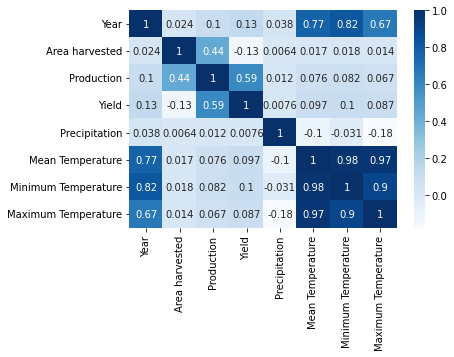

In [ ]:
import seaborn as sb
corr = df3.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.loc[:,['Area harvested','Production','Precipitation','Mean Temperature',	
                                                               'Minimum Temperature','Maximum Temperature']],
                                                    df3.loc[:,['Yield']], test_size=0.33, random_state=42)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5187479445790828


In [ ]:
y_pred1=regr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('Coefficient of Determination (R2 Score)',r2_score(y_test, y_pred1))
print('Mean Squared Error= ',mean_squared_error(y_test, y_pred1))

Coefficient of Determination (R2 Score) 0.5187479445790828
Mean Squared Error=  4412556037.035726


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR

regr1 = SVR(C=1.0, epsilon=0.2).fit(X_train, y_train)
#regr.predict(X_test[:2])
regr1.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.17460287289303622

In [ ]:
y_pred2=regr1.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred2))
print('Mean Squared Error= ',mean_squared_error(y_test, y_pred2))

Coefficient of Determination (R2 Score)= -0.17460287289303622
Mean Squared Error=  10769826205.459984


# Bayesian Ridge regressor

In [ ]:
from sklearn.linear_model import BayesianRidge
regr2 = BayesianRidge().fit(X_train, y_train)
#regr.predict(X_test[:2])
regr2.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5154728882542559

In [ ]:
y_pred3=regr2.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred3))
print('Mean Squared Error= ',mean_squared_error(y_test, y_pred3))

Coefficient of Determination (R2 Score)= 0.5154728882542559
Mean Squared Error=  4442584728.643303


# Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
regr3 = SGDRegressor().fit(X_train, y_train)
#regr.predict(X_test[:2])
regr3.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-7.239434232818193e+35

In [ ]:
y_pred4=regr3.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred4))
print('Mean Squared Error= ',mean_squared_error(y_test, y_pred4))

Coefficient of Determination (R2 Score)= -7.239434232818193e+35
Mean Squared Error=  6.637770970308998e+45


# Model Comparison

In [ ]:
comp=pd.DataFrame({'Models':['Linear Regression','Support Vector Machine', 'Bayesian Ridge regressor', 'Stochastic Gradient Descent' ],
                   'Coefficient of Determination (R2 Score) ':[r2_score(y_test, y_pred1),r2_score(y_test, y_pred2),r2_score(y_test, y_pred3),r2_score(y_test, y_pred4)],
                   'Mean Squared Error':[mean_squared_error(y_test, y_pred1),mean_squared_error(y_test, y_pred2),mean_squared_error(y_test, y_pred3), mean_squared_error(y_test, y_pred4)] })

In [ ]:
comp

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
0,Linear Regression,5.187479e-01,4.412556e+09
1,Support Vector Machine,-1.746029e-01,1.076983e+10
2,Bayesian Ridge regressor,5.154729e-01,4.442585e+09
3,Stochastic Gradient Descent,-7.239434e+35,6.637771e+45
